In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from jupyterthemes import jtplot
from sklearn.metrics import auc, roc_curve, roc_auc_score
import copy
%matplotlib inline

### Load data from csv for train and test

In [2]:
data = pd.read_csv('train.csv')
orig_data = copy.deepcopy(data)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Drop ID column, it's useless for us

In [5]:
data = data.drop(columns=['Id'])

In [6]:
# MSSubClass is categorial, so let's make it string

data['MSSubClass'] = data['MSSubClass'].astype('str')

In [7]:
#Находим категориальные признаки
cat_feat = list(data.dtypes[data.dtypes == object].index)
cat_feat

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [8]:
#закодируем пропущенные значений строкой, факт пропущенного значения тоже может нести в себе информацию
data[cat_feat] = data[cat_feat].fillna('Not in list')
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Not in list,Reg,Lvl,AllPub,Inside,...,0,Not in list,Not in list,Not in list,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Not in list,Reg,Lvl,AllPub,FR2,...,0,Not in list,Not in list,Not in list,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,Not in list,IR1,Lvl,AllPub,Inside,...,0,Not in list,Not in list,Not in list,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,Not in list,IR1,Lvl,AllPub,Corner,...,0,Not in list,Not in list,Not in list,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,Not in list,IR1,Lvl,AllPub,FR2,...,0,Not in list,Not in list,Not in list,0,12,2008,WD,Normal,250000


In [9]:
#отфильтруем непрерывные признаки
num_feat = [f for f in data if f not in (cat_feat + ['ID'])]

# Смотрим сколько у нас значений по каждому категориальному признаку
cat_nunique = data[cat_feat].nunique()
print(cat_nunique)

MSSubClass       15
MSZoning          5
Street            2
Alley             3
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        5
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        6
KitchenQual       4
Functional        7
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
PoolQC            4
Fence             5
MiscFeature       5
SaleType          9
SaleCondition     6
dtype: int64


In [10]:
# Создаем дамми-переменные для категорий
dummy = pd.get_dummies(data[cat_feat], columns=cat_feat)
dummy

,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [11]:
# Заменяем пропуски на специальное значение 0.0, чтобы деревья могли их отличить
data = pd.concat([data[num_feat].fillna(0.0), dummy], axis=1)
data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0


### Split data to train and test

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['SalePrice']), data['SalePrice'], test_size=0.3)

In [13]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
762,72.0,8640,7,5,2009,2009,0.0,24,0,732,...,0,0,0,0,0,0,0,0,1,0
1031,102.0,15863,7,3,1920,1970,0.0,523,0,301,...,0,0,0,1,0,0,0,0,1,0
949,78.0,9360,6,7,1972,2006,0.0,982,0,179,...,0,0,0,1,0,0,0,0,1,0
1016,73.0,11883,7,5,1996,1996,196.0,690,0,814,...,0,0,0,1,0,0,0,0,1,0
672,0.0,11250,6,6,1977,1977,0.0,767,0,441,...,0,0,0,1,0,0,0,0,1,0


In [14]:
y_train.head()

762     215200
1031    197000
949     197500
1016    203000
672     165000
Name: SalePrice, dtype: int64

In [15]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
762,72.0,8640,7,5,2009,2009,0.0,24,0,732,...,0,0,0,0,0,0,0,0,1,0
1031,102.0,15863,7,3,1920,1970,0.0,523,0,301,...,0,0,0,1,0,0,0,0,1,0
949,78.0,9360,6,7,1972,2006,0.0,982,0,179,...,0,0,0,1,0,0,0,0,1,0
1016,73.0,11883,7,5,1996,1996,196.0,690,0,814,...,0,0,0,1,0,0,0,0,1,0
672,0.0,11250,6,6,1977,1977,0.0,767,0,441,...,0,0,0,1,0,0,0,0,1,0


In [16]:
X_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1179,77.0,8335,5,5,1954,1954,0.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
873,60.0,12144,5,7,1949,1950,0.0,375,0,457,...,0,0,0,1,0,0,0,0,1,0
200,80.0,8546,4,5,2003,2004,0.0,0,0,1121,...,0,0,0,1,0,0,0,0,1,0
263,50.0,5500,5,7,1929,2001,0.0,234,692,0,...,0,0,0,1,0,0,0,0,1,0
1451,78.0,9262,8,5,2008,2009,194.0,0,0,1573,...,0,1,0,0,0,0,0,0,0,1


In [17]:
X_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.00000,1022.000000,...,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,58.422701,10399.324853,6.100783,5.560665,1971.658513,1984.846380,107.440313,440.815068,44.23092,561.208415,...,0.003914,0.087084,0.001957,0.861057,0.067515,0.003914,0.006849,0.017613,0.815068,0.089041
std,34.073025,9162.656447,1.372252,1.115178,29.903597,20.599176,187.873053,434.941463,161.65598,447.667257,...,0.062469,0.282096,0.044216,0.346057,0.251034,0.062469,0.082517,0.131603,0.388432,0.284942
min,0.000000,1300.000000,2.000000,2.000000,1875.000000,1950.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.000000,7500.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.00000,216.250000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,64.000000,9434.500000,6.000000,5.000000,1973.000000,1993.500000,0.000000,395.500000,0.00000,459.500000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,79.000000,11470.500000,7.000000,6.000000,2001.000000,2004.000000,169.000000,701.500000,0.00000,795.750000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,1474.00000,2336.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
data_types = X_train.dtypes
data_types.groupby(data_types).count()

uint8      283
int64       32
float64      3
dtype: int64

### Let's view some pair plots to search feature dependencies

In [94]:
#_ = sns.pairplot(X_train[list(X_train.columns)]).add_legend()

# SNS use a lot of time to show plots, need to find something another to compare features between each... 

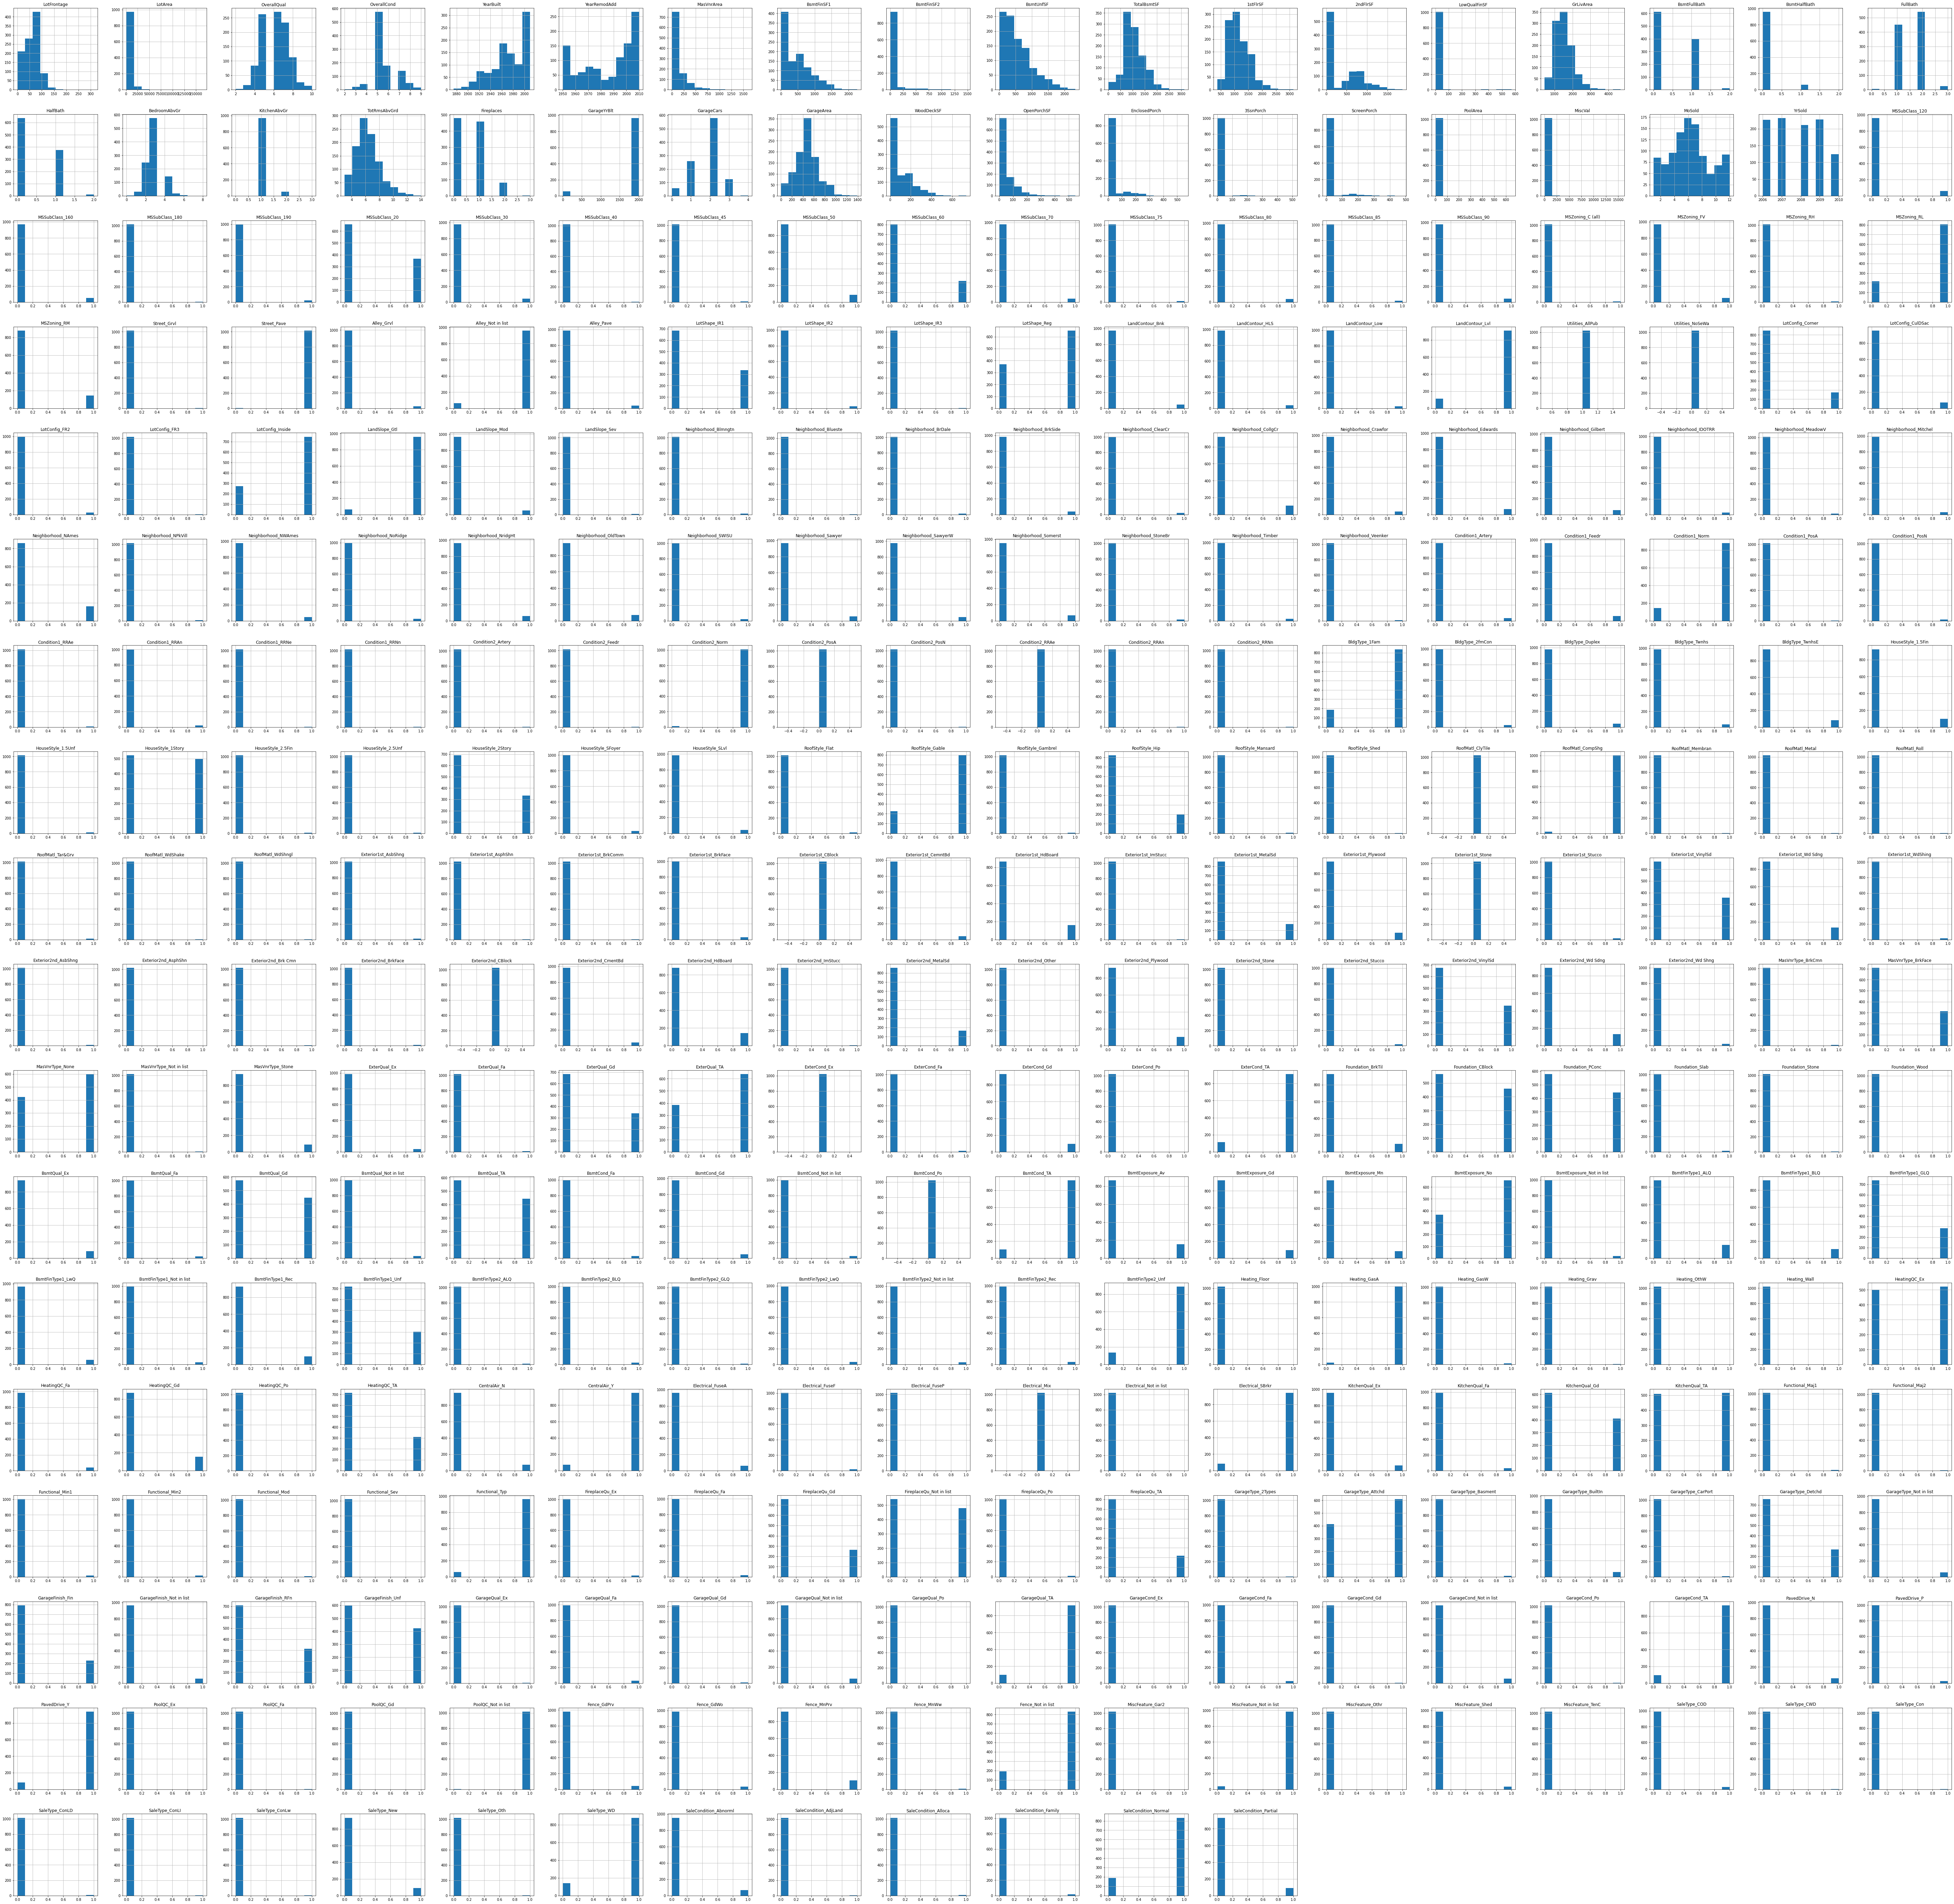

In [90]:
X_train.hist(bins=10, figsize=(100, 100))
plt.show()

### Create forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf_rf1 = RandomForestClassifier(n_estimators=20, max_depth=10, min_samples_leaf=10, max_features=1, n_jobs=-1)
clf_rf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=1, min_samples_leaf=10,
                       n_estimators=20, n_jobs=-1)

In [21]:
# I didn't know yet the right way to measure data score, but I find mean_squared_error func (accuracy_score, and .score() ), let's measure using it.


from sklearn.metrics import accuracy_score, mean_squared_error

def mse_score(model, etalon=None, x_train=X_train, x_test=X_test):
    my_pred_train_data = model.predict(x_train)
    my_pred_test_data = model.predict(x_test)
    
    print(f'--- Train: Pred.val: {my_pred_train_data[0]}  Orig.val: {y_train.iloc[0]}')
    print(f'--- Test: Pred.val: {my_pred_test_data[0]}  Orig.val: {y_test.iloc[0]}')
    
    mse_train = np.sqrt(mean_squared_error(y_train, my_pred_train_data))
    mse_test = np.sqrt(mean_squared_error(y_test, my_pred_test_data))
    
    acc_train = accuracy_score(y_train, my_pred_train_data)
    acc_test = accuracy_score(y_test, my_pred_test_data)
    
    score_train = model.score(x_train, y_train)
    score_test = model.score(x_test, y_test)
    
    print(f'MSE Train: {mse_train}  MSE Test: {mse_test} ')
    print(f'Acc_train: {acc_train} Acc_test: {acc_test}')
    print(f'Score Train: {score_train}  Score Test: {score_test}')
    if etalon is not None:
        print(f'Diff with etalon:')
        print(f'MSETrain: {etalon[0] - mse_train}  MSETest: {etalon[1] - mse_test} ')
        print(f'Acc_train: {etalon[2] - acc_train} Acc_test: {etalon[3] - acc_test}')
        print(f'Score_train: {etalon[3] - score_train} Score_test: {etalon[4] - score_test}')
        
    return (mse_train,mse_test,acc_train,acc_test,score_test,score_train)


In [22]:
etalon_score = mse_score(clf_rf1, None, X_train, X_test)

--- Train: Pred.val: 140000  Orig.val: 215200
--- Test: Pred.val: 115000  Orig.val: 93000
MSE Train: 76067.0605226195  MSE Test: 81754.08740234868 
Acc_train: 0.03522504892367906 Acc_test: 0.01141552511415525
Score Train: 0.03522504892367906  Score Test: 0.01141552511415525


### Try to search best forest

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [10, 25, 50, 75, 100, 150],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : list(range(2, 8)),
    'min_samples_leaf': [1,2,5,10]
}
CV_rfc = GridSearchCV(estimator=clf_rf1, param_grid=param_grid, verbose=5, cv=10)
_ = CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[CV 1/10] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   2.0s
[CV 2/10] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 3/10] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 4/10] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 5/10] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 6/10] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 7/10] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 8/10] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 9/10] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 10/10] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=10

[CV 2/10] END max_depth=2, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 3/10] END max_depth=2, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 4/10] END max_depth=2, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 5/10] END max_depth=2, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 6/10] END max_depth=2, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 7/10] END max_depth=2, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 8/10] END max_depth=2, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 9/10] END max_depth=2, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 10/10] END max_depth=2, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 1/10] END max_depth=2, max_features=auto, min_samples_leaf=2, n_estimators=75

[CV 3/10] END max_depth=2, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 4/10] END max_depth=2, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 5/10] END max_depth=2, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 6/10] END max_depth=2, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 7/10] END max_depth=2, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.5s
[CV 8/10] END max_depth=2, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 9/10] END max_depth=2, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 10/10] END max_depth=2, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 1/10] END max_depth=2, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 2/10] END max_depth=2, max_features=auto, min_samples_leaf=5, n_esti

[CV 3/10] END max_depth=2, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 4/10] END max_depth=2, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 5/10] END max_depth=2, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 6/10] END max_depth=2, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 7/10] END max_depth=2, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 8/10] END max_depth=2, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 9/10] END max_depth=2, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.3s
[CV 10/10] END max_depth=2, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 1/10] END max_depth=2, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 2/10] END max_depth=2, max_features=sqrt, min_samples_leaf=1, n_estimators=25

[CV 4/10] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 5/10] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 6/10] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 7/10] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 8/10] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 9/10] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 10/10] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 1/10] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 2/10] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 3/10] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=75

[CV 5/10] END max_depth=2, max_features=sqrt, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 6/10] END max_depth=2, max_features=sqrt, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 7/10] END max_depth=2, max_features=sqrt, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 8/10] END max_depth=2, max_features=sqrt, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 9/10] END max_depth=2, max_features=sqrt, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 10/10] END max_depth=2, max_features=sqrt, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 1/10] END max_depth=2, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.5s
[CV 2/10] END max_depth=2, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.5s
[CV 3/10] END max_depth=2, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.5s
[CV 4/10] END max_depth=2, max_features=sqrt, min_samples_leaf=5, n_esti

[CV 6/10] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 7/10] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 8/10] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 9/10] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 10/10] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 1/10] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 2/10] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 3/10] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 4/10] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 5/10] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=25

[CV 7/10] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 8/10] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 9/10] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 10/10] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 1/10] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 2/10] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 3/10] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.5s
[CV 4/10] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.5s
[CV 5/10] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 6/10] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=75

[CV 7/10] END max_depth=3, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.5s
[CV 8/10] END max_depth=3, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.5s
[CV 9/10] END max_depth=3, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.5s
[CV 10/10] END max_depth=3, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.5s
[CV 1/10] END max_depth=3, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 2/10] END max_depth=3, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 3/10] END max_depth=3, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 4/10] END max_depth=3, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 5/10] END max_depth=3, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 6/10] END max_depth=3, max_features=auto, min_samples_leaf=5, n_esti

[CV 8/10] END max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 9/10] END max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 10/10] END max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 1/10] END max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 2/10] END max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 3/10] END max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 4/10] END max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 5/10] END max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 6/10] END max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 7/10] END max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=25

[CV 9/10] END max_depth=3, max_features=sqrt, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 10/10] END max_depth=3, max_features=sqrt, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 1/10] END max_depth=3, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 2/10] END max_depth=3, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 3/10] END max_depth=3, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 4/10] END max_depth=3, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 5/10] END max_depth=3, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 6/10] END max_depth=3, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 7/10] END max_depth=3, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 8/10] END max_depth=3, max_features=sqrt, min_samples_leaf=2, n_estimators=75

[CV 9/10] END max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=100; total time=   0.5s
[CV 10/10] END max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 1/10] END max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 2/10] END max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 3/10] END max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 4/10] END max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 5/10] END max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 6/10] END max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 7/10] END max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 8/10] END max_depth=3, max_features=sqrt, min_samples_leaf=5, n_esti

[CV 10/10] END max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 1/10] END max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 2/10] END max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 3/10] END max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 4/10] END max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 5/10] END max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 6/10] END max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 7/10] END max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 8/10] END max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 9/10] END max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=25

[CV 1/10] END max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 2/10] END max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 3/10] END max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 4/10] END max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 5/10] END max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 6/10] END max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 7/10] END max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 8/10] END max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 9/10] END max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 10/10] END max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=75

[CV 1/10] END max_depth=4, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 2/10] END max_depth=4, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 3/10] END max_depth=4, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 4/10] END max_depth=4, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 5/10] END max_depth=4, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 6/10] END max_depth=4, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 7/10] END max_depth=4, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 8/10] END max_depth=4, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 9/10] END max_depth=4, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 10/10] END max_depth=4, max_features=auto, min_samples_leaf=5, n_esti

[CV 1/10] END max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 2/10] END max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 3/10] END max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 4/10] END max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 5/10] END max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 6/10] END max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 7/10] END max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 8/10] END max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 9/10] END max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 10/10] END max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=25

[CV 2/10] END max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 3/10] END max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 4/10] END max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 5/10] END max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 6/10] END max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 7/10] END max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 8/10] END max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 9/10] END max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 10/10] END max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 1/10] END max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=10

[CV 2/10] END max_depth=4, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 3/10] END max_depth=4, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 4/10] END max_depth=4, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 5/10] END max_depth=4, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 6/10] END max_depth=4, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 7/10] END max_depth=4, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 8/10] END max_depth=4, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 9/10] END max_depth=4, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 10/10] END max_depth=4, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 1/10] END max_depth=4, max_features=sqrt, min_samples_leaf=10, n_est

[CV 2/10] END max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 3/10] END max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 4/10] END max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 5/10] END max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 6/10] END max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 7/10] END max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 8/10] END max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 9/10] END max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 10/10] END max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 1/10] END max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=50

[CV 3/10] END max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 4/10] END max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 5/10] END max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 6/10] END max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 7/10] END max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 8/10] END max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 9/10] END max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 10/10] END max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 1/10] END max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 2/10] END max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=1

[CV 3/10] END max_depth=5, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 4/10] END max_depth=5, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 5/10] END max_depth=5, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 6/10] END max_depth=5, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 7/10] END max_depth=5, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 8/10] END max_depth=5, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 9/10] END max_depth=5, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 10/10] END max_depth=5, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 1/10] END max_depth=5, max_features=auto, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 2/10] END max_depth=5, max_features=auto, min_samples_leaf=10, n_est

[CV 3/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 4/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 5/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 6/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 7/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 8/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 9/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 10/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 1/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV 2/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=50

[CV 4/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 5/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 6/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 7/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 8/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 9/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 10/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 1/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 2/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 3/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=

[CV 4/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 5/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 6/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 7/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 8/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 9/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 10/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 1/10] END max_depth=5, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 2/10] END max_depth=5, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 3/10] END max_depth=5, max_features=sqrt, min_samples_leaf=10, n_est

[CV 4/10] END max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 5/10] END max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 6/10] END max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 7/10] END max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 8/10] END max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 9/10] END max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 10/10] END max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 1/10] END max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV 2/10] END max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV 3/10] END max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=50

[CV 5/10] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 6/10] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 7/10] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 8/10] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 9/10] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.3s
[CV 10/10] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 1/10] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 2/10] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 3/10] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 4/10] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators

[CV 5/10] END max_depth=6, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 6/10] END max_depth=6, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 7/10] END max_depth=6, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 8/10] END max_depth=6, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 9/10] END max_depth=6, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.8s
[CV 10/10] END max_depth=6, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.8s
[CV 1/10] END max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 2/10] END max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 3/10] END max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 4/10] END max_depth=6, max_features=auto, min_samples_leaf=10, n_est

[CV 5/10] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 6/10] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 7/10] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 8/10] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 9/10] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 10/10] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 1/10] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV 2/10] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV 3/10] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV 4/10] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50

[CV 6/10] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 7/10] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 8/10] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 9/10] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 10/10] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 1/10] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 2/10] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 3/10] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 4/10] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 5/10] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimator

[CV 6/10] END max_depth=6, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.9s
[CV 7/10] END max_depth=6, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.8s
[CV 8/10] END max_depth=6, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 9/10] END max_depth=6, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 10/10] END max_depth=6, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.8s
[CV 1/10] END max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 2/10] END max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 3/10] END max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 4/10] END max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 5/10] END max_depth=6, max_features=sqrt, min_samples_leaf=10, n_est

[CV 6/10] END max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 7/10] END max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 8/10] END max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 9/10] END max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 10/10] END max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 1/10] END max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.4s
[CV 2/10] END max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV 3/10] END max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV 4/10] END max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV 5/10] END max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=50

[CV 7/10] END max_depth=7, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 8/10] END max_depth=7, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 9/10] END max_depth=7, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 10/10] END max_depth=7, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.3s
[CV 1/10] END max_depth=7, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 2/10] END max_depth=7, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 3/10] END max_depth=7, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 4/10] END max_depth=7, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 5/10] END max_depth=7, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 6/10] END max_depth=7, max_features=auto, min_samples_leaf=2, n_estimato

[CV 7/10] END max_depth=7, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 8/10] END max_depth=7, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 9/10] END max_depth=7, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 10/10] END max_depth=7, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.9s
[CV 1/10] END max_depth=7, max_features=auto, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 2/10] END max_depth=7, max_features=auto, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 3/10] END max_depth=7, max_features=auto, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 4/10] END max_depth=7, max_features=auto, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 5/10] END max_depth=7, max_features=auto, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 6/10] END max_depth=7, max_features=auto, min_samples_leaf=10, n_est

[CV 7/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 8/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 9/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 10/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 1/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.4s
[CV 2/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.4s
[CV 3/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.4s
[CV 4/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.4s
[CV 5/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.4s
[CV 6/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=50

[CV 8/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.5s
[CV 9/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 10/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.5s
[CV 1/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.6s
[CV 2/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.6s
[CV 3/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.6s
[CV 4/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.6s
[CV 5/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.6s
[CV 6/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.6s
[CV 7/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimat

[CV 8/10] END max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 9/10] END max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.8s
[CV 10/10] END max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.8s
[CV 1/10] END max_depth=7, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 2/10] END max_depth=7, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 3/10] END max_depth=7, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 4/10] END max_depth=7, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 5/10] END max_depth=7, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 6/10] END max_depth=7, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 7/10] END max_depth=7, max_features=sqrt, min_samples_leaf=10, n_est

{'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'n_estimators': 100}

### So, GridSearcgCV said: best params are - {'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 10, 'n_estimators': 100}

In [24]:
clf_rf = RandomForestClassifier(max_depth=6, max_features='auto', min_samples_leaf=10, n_estimators=100, n_jobs=-1)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=10, n_jobs=-1)

In [25]:
etalon_score = mse_score(clf_rf, etalon_score, X_train, X_test)

--- Train: Pred.val: 215200  Orig.val: 215200
--- Test: Pred.val: 115000  Orig.val: 93000
MSE Train: 25074.25490316949  MSE Test: 49226.01630439857 
Acc_train: 0.5440313111545988 Acc_test: 0.0136986301369863
Score Train: 0.5440313111545988  Score Test: 0.0136986301369863
Diff with etalon:
MSETrain: 50992.80561945001  MSETest: 32528.071097950116 
Acc_train: -0.5088062622309197 Acc_test: -0.00228310502283105
Score_train: -0.5326157860404436 Score_test: -0.00228310502283105


### Check features, make some plots to filter non-important

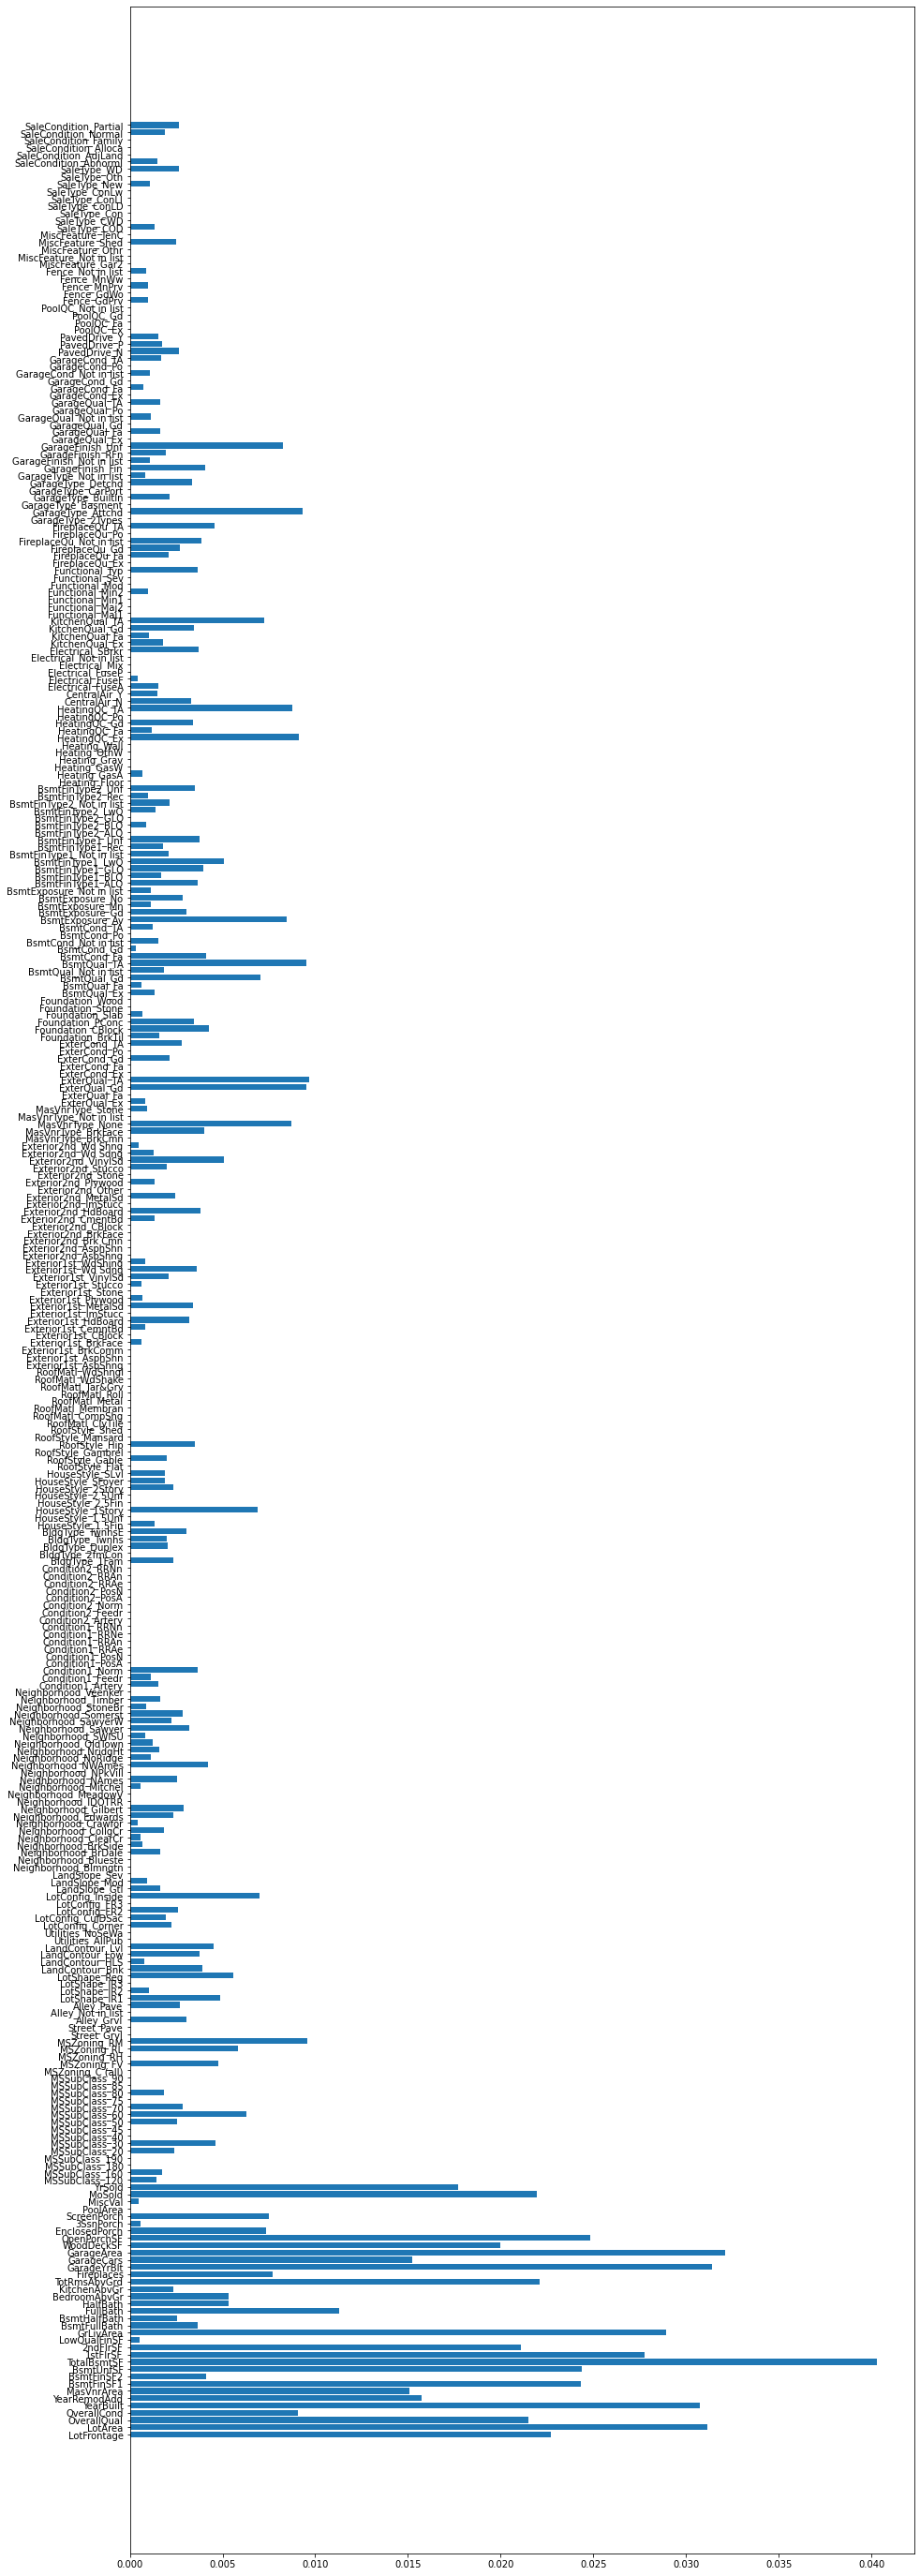

In [26]:
plt.figure(figsize=(15, 50))

features, columns = clf_rf.feature_importances_, X_train.columns

plt.barh(np.arange(len(features)), features)
_ = plt.yticks(np.arange(len(columns)), columns)

### Let's remove non-important features 

In [27]:
zipped = list(zip(clf_rf.feature_importances_, X_train.columns))
importants = [x for x in zipped if x[0] > 0.002]
unzipped = list(zip(*importants))
unzipped

[(0.022715466996455515,
  0.031132122940014897,
  0.02149211211118607,
  0.009043773431665193,
  0.030727586775503385,
  0.01575781852145298,
  0.015069868381358093,
  0.0243080740069906,
  0.0041031308335293115,
  0.024391590625653277,
  0.040281605023825835,
  0.027770529875396518,
  0.0210730674376882,
  0.028922263154780446,
  0.003670247219970279,
  0.002551803020876726,
  0.011302457328774287,
  0.005349717740532075,
  0.005312653480219995,
  0.00233648786488767,
  0.022085625417432864,
  0.007697711983658088,
  0.03140092112488728,
  0.015235553727827611,
  0.032091900594880866,
  0.01996897991478057,
  0.02484947476630445,
  0.007348029951249263,
  0.007515598109214092,
  0.021959102836418012,
  0.01769151310357079,
  0.002396839454640716,
  0.004604459732113259,
  0.002540467552841428,
  0.006296800445266926,
  0.002872799558562838,
  0.004763971193361744,
  0.005815509831241924,
  0.009569127919183329,
  0.003034777033642458,
  0.00270177708933869,
  0.004860162445563776,
  0

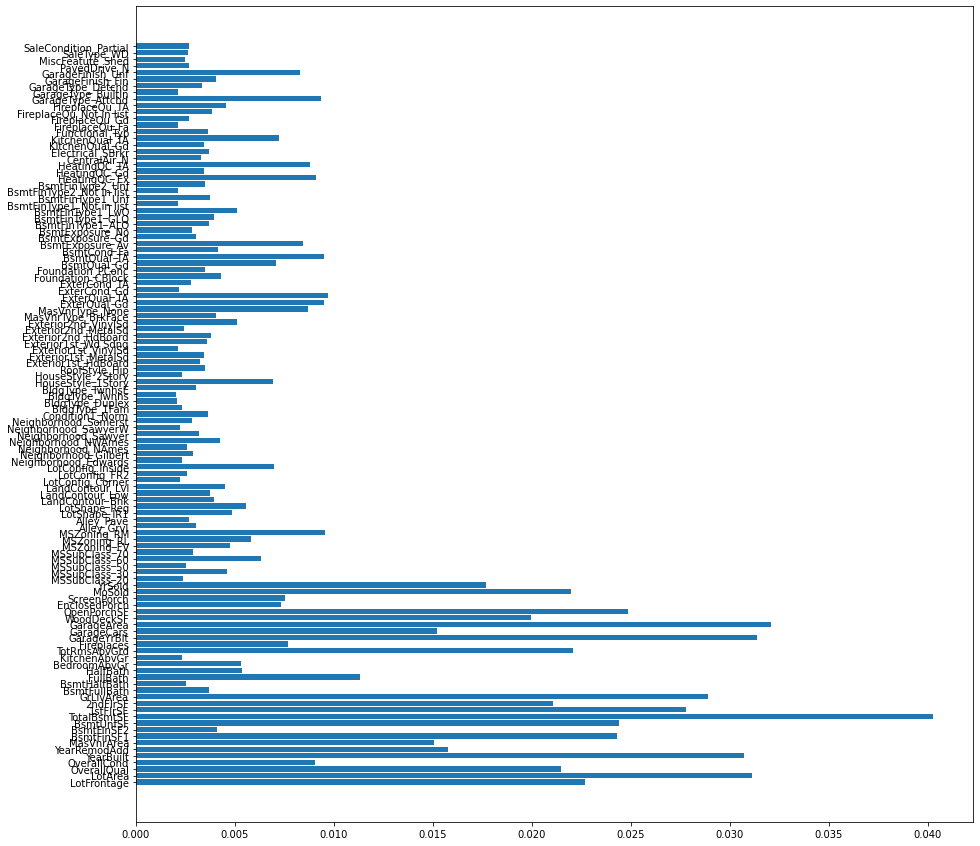

In [28]:
plt.figure(figsize=(15, 15))

important_features, important_columns = unzipped[0], unzipped[1]

plt.barh(np.arange(len(important_features)), important_features)
_ = plt.yticks(np.arange(len(important_columns)), important_columns)

In [29]:
len(important_columns)

113

### Let's try to use important features only

In [30]:
dropped_cols = [x for x in X_train if x not in important_columns]
dropped_cols

['LowQualFinSF',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MSSubClass_120',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSZoning_C (all)',
 'MSZoning_RH',
 'Street_Grvl',
 'Street_Pave',
 'Alley_Not in list',
 'LotShape_IR2',
 'LotShape_IR3',
 'LandContour_HLS',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'LotConfig_CulDSac',
 'LotConfig_FR3',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NPkVill',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition1_Artery',
 'Condition1

In [31]:
X_train_important = X_train.drop(columns=dropped_cols)
X_train_important.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageFinish_Fin,GarageFinish_Unf,PavedDrive_N,MiscFeature_Shed,SaleType_WD,SaleCondition_Partial
762,72.0,8640,7,5,2009,2009,0.0,24,0,732,...,0,1,0,0,0,1,0,0,0,0
1031,102.0,15863,7,3,1920,1970,0.0,523,0,301,...,1,0,0,0,1,0,0,0,1,0
949,78.0,9360,6,7,1972,2006,0.0,982,0,179,...,1,1,0,0,0,0,0,0,1,0
1016,73.0,11883,7,5,1996,1996,196.0,690,0,814,...,1,1,0,0,1,0,0,0,1,0
672,0.0,11250,6,6,1977,1977,0.0,767,0,441,...,1,1,0,0,0,0,0,0,1,0


In [32]:
X_test_important = X_test.drop(columns=dropped_cols)
X_test_important.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageFinish_Fin,GarageFinish_Unf,PavedDrive_N,MiscFeature_Shed,SaleType_WD,SaleCondition_Partial
1179,77.0,8335,5,5,1954,1954,0.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
873,60.0,12144,5,7,1949,1950,0.0,375,0,457,...,0,1,0,0,0,1,0,0,1,0
200,80.0,8546,4,5,2003,2004,0.0,0,0,1121,...,0,1,0,0,0,0,0,0,1,0
263,50.0,5500,5,7,1929,2001,0.0,234,692,0,...,0,0,0,1,0,1,0,0,1,0
1451,78.0,9262,8,5,2008,2009,194.0,0,0,1573,...,0,1,0,0,1,0,0,0,0,1


In [33]:
clf_rf.fit(X_train_important, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=10, n_jobs=-1)

In [34]:
_ = mse_score(clf_rf, etalon_score, X_train_important, X_test_important)

--- Train: Pred.val: 173000  Orig.val: 215200
--- Test: Pred.val: 140000  Orig.val: 93000
MSE Train: 18925.256571638554  MSE Test: 44707.12372426062 
Acc_train: 0.6007827788649707 Acc_test: 0.0182648401826484
Score Train: 0.6007827788649707  Score Test: 0.0182648401826484
Diff with etalon:
MSETrain: 6148.998331530936  MSETest: 4518.892580137945 
Acc_train: -0.05675146771037187 Acc_test: -0.0045662100456621
Score_train: -0.5870841487279843 Score_test: -0.0045662100456621


### Let's add ensemble

In [35]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

### Prepare data

In [36]:
from sklearn.preprocessing import StandardScaler

X_train_ensemble = X_train.copy(deep=True)
X_test_ensemble = X_test.copy(deep=True)

In [37]:
if 'SalePrice' in num_feat: num_feat.remove('SalePrice')

In [38]:
train_median = X_train_ensemble[num_feat].median()

scaler = StandardScaler()
scaler.fit(X_train_ensemble[num_feat])

X_train_ensemble[num_feat] = scaler.transform(X_train_ensemble[num_feat])
X_test_ensemble[num_feat] = scaler.transform(X_test_ensemble[num_feat])

In [39]:
X_train_ensemble

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
762,0.398672,-0.192104,0.655607,-0.503005,1.249340,1.173127,-0.572157,-0.958794,-0.273745,0.381701,...,0,0,0,0,0,0,0,0,1,0
1031,1.279565,0.596590,0.655607,-2.297318,-1.728347,-0.721080,-0.572157,0.189049,-0.273745,-0.581539,...,0,0,0,1,0,0,0,0,1,0
949,0.574850,-0.113486,-0.073479,1.291309,0.011425,1.027419,-0.572157,1.244880,-0.273745,-0.854196,...,0,0,0,1,0,0,0,0,1,0
1016,0.428035,0.162006,0.655607,-0.503005,0.814397,0.541725,0.471611,0.573197,-0.273745,0.564963,...,0,0,0,1,0,0,0,0,1,0
672,-1.715472,0.092887,-0.073479,0.394152,0.178711,-0.381094,-0.572157,0.750319,-0.273745,-0.268653,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,1.162112,-0.172450,-0.802565,0.394152,-2.732062,0.541725,-0.572157,1.488710,-0.273745,-1.254242,...,0,0,0,1,0,0,0,0,1,0
834,0.486761,-0.275636,-0.802565,0.394152,-0.356604,-1.158204,0.152090,0.301763,-0.273745,0.024118,...,0,0,0,1,0,0,0,0,1,0
1422,-0.629037,-0.651257,-0.073479,-0.503005,1.048597,0.881710,0.333152,0.563995,-0.273745,-0.892189,...,0,0,0,1,0,0,0,0,1,0
720,-1.715472,-0.418896,1.384693,-0.503005,0.446368,0.007461,-0.572157,1.626727,-0.273745,0.073286,...,0,0,0,1,0,0,0,0,1,0


In [41]:
X_train_ensemble.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,...,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,9.038215e-17,6.952473e-17,2.050980e-16,2.415984e-16,2.541129e-15,3.573571e-15,6.691755e-17,-3.823860e-17,1.390495e-17,1.121086e-16,...,0.001957,0.079256,0.000978,0.871820,0.072407,0.001957,0.009785,0.012720,0.820939,0.082192
std,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,...,0.044216,0.270271,0.031281,0.334454,0.259288,0.044216,0.098481,0.112119,0.383591,0.274791
min,-1.645491e+00,-8.968214e-01,-3.764751e+00,-3.165230e+00,-3.258169e+00,-1.712124e+00,-5.510422e-01,-9.470508e-01,-3.001048e-01,-1.257281e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.274895e-01,-2.892651e-01,-8.315888e-01,-5.057082e-01,-5.651530e-01,-8.821221e-01,-5.510422e-01,-9.470508e-01,-3.001048e-01,-7.953636e-01,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.390228e-01,-1.137900e-01,-9.829824e-02,-5.057082e-01,9.168030e-02,4.361166e-01,-5.510422e-01,-1.402035e-01,-3.001048e-01,-2.049512e-01,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,5.922327e-01,8.616676e-02,6.349923e-01,3.807992e-01,9.784052e-01,9.243532e-01,3.085907e-01,5.983393e-01,-3.001048e-01,5.316796e-01,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,7.220427e+00,1.940440e+01,2.834864e+00,3.040321e+00,1.273980e+00,1.217295e+00,8.005179e+00,1.110016e+01,8.329966e+00,3.917966e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
from sklearn.svm import LinearSVC

In [76]:
classifier = StackingClassifier(
    [
        ('RF', RandomForestClassifier()),
        ('LogR', LogisticRegression(max_iter=1e8)),
        ('DTC', DecisionTreeClassifier()),
        ('SVC', LinearSVC(max_iter=1e8, random_state=42)),
    ],
LogisticRegression())

In [77]:
classifier.fit(X_train_ensemble, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:985: RuntimeWarning: Number of classes in training fold (466) does not match total number of classes (541). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn('Number of classes in training fold ({}) does '
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:985: RuntimeWarning: Number of classes in training fold (473) does not match total number of classes (541). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn('Number of classes in training fold ({}) do

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:985: RuntimeWarning: Number of classes in training fold (470) does not match total number of classes (541). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn('Number of classes in training fold ({}) does '
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

StackingClassifier(estimators=[('RF', RandomForestClassifier()),
                               ('LogR',
                                LogisticRegression(max_iter=100000000.0)),
                               ('DTC', DecisionTreeClassifier()),
                               ('SVC',
                                LinearSVC(max_iter=100000000.0,
                                          random_state=42))],
                   final_estimator=LogisticRegression())

In [92]:
mse_score(classifier, etalon_score, X_train_ensemble, X_test_ensemble)

--- Train: Pred.val: 34900  Orig.val: 215200
--- Test: Pred.val: 34900  Orig.val: 93000
MSE Train: 165599.18436308255  MSE Test: 167658.53523767018 
Acc_train: 0.0009784735812133072 Acc_test: 0.0
Score Train: 0.0009784735812133072  Score Test: 0.0
Diff with etalon:
MSETrain: -140524.92945991305  MSETest: -118432.51893327161 
Acc_train: 0.5430528375733855 Acc_test: 0.0136986301369863
Score_train: 0.012720156555772993 Score_test: 0.0136986301369863


(165599.18436308255,
 167658.53523767018,
 0.0009784735812133072,
 0.0,
 0.0,
 0.0009784735812133072)